In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [2]:
url = 'http://www.popvortex.com/music/netherlands/top-songs.php'

In [3]:
response = requests.get(url)
response.status_code

200

In [4]:
soup = BeautifulSoup(response.content, "html.parser")

In [5]:
soup.select('#chart-position-1 > div.chart-content.col-xs-12.col-sm-8')

[<div class="chart-content col-xs-12 col-sm-8"><p class="title-artist"><cite class="title">Easy On Me</cite><em class="artist">Adele</em></p><ul><li><strong>Genre</strong>: Pop</li><li><strong>Release Date</strong>: 15-10-2021</li><li class="billboard-chart">Former #1 song on the <cite>Billboard Hot 100</cite> chart.</li></ul><a aria-label="Stream Easy On Me - Adele on Apple Music" class="buy-button button" href="https://music.apple.com/nl/album/easy-on-me/1590035691?i=1590036021&amp;uo=2&amp;partnerId=11&amp;at=10l4UI&amp;app=music&amp;ct=music-songs" rel="nofollow noopener">Listen on Apple Music</a> <a aria-label="Buy Easy On Me - Adele on iTunes" class="buy-button button" href="https://music.apple.com/nl/album/easy-on-me/1590035691?i=1590036021&amp;uo=2&amp;partnerId=11&amp;at=10l4UI&amp;app=itunes&amp;ct=music-songs" rel="nofollow noopener">Buy on iTunes</a> <a aria-label="Buy Easy On Me - Adele on Amazon" class="amazon-buy button" href="https://www.amazon.com/gp/search?ie=UTF8&amp

In [6]:
soup.cite.get_text()

'Easy On Me'

In [7]:
soup.em.get_text()

'Adele'

In [8]:
soup.select('cite.title')[0]

<cite class="title">Easy On Me</cite>

In [9]:
soup.select('cite.title')[0].get_text()

'Easy On Me'

In [10]:
soup.select('em.artist')[0]

<em class="artist">Adele</em>

In [11]:
title = []
artist = []

num_iter = len(soup.select('cite.title'))

for i in range(num_iter):
    title.append(soup.select('cite.title')[i].get_text())
    artist.append(soup.select('em.artist')[i].get_text())
    
print(title)
print(artist)

# each list becomes a column
songs = pd.DataFrame({"title":title,
                       "artist":artist,
                      })


['Easy On Me', 'Neem Er Één Van Mij', 'Do It To It (feat. Cherish)', 'Dat Heb Jij Gedaan', 'Cold Heart (PNAU Remix)', 'Better Days', 'Moth To A Flame', 'Hold On', 'The Motto', 'I Drink Wine', 'Hold Me', 'Ons Moeder Zeej Nog', 'Schiddi Widdi Witt', 'Thunder', 'Hard To Say Goodbye', 'Love Is A Game', 'Three Little Birds', 'Pepas', 'Misschien Huil Ik Niet Hard Genoeg', 'Mañana', 'Baby Lekker Ding', 'Everybody Needs Somebody To Love', 'To Be Loved', 'Overpass Graffiti', 'Alle Remmen Los', 'Only You', 'Dopamine (feat. Eyelar)', 'Can I Get It', 'In De Nacht', 'Skyfall', 'Rolling In the Deep', 'Hello', 'Nothing Else Matters', 'Bohemian Rhapsody', 'Pastorale', 'Happy Birthday', 'Santa Tell Me', 'Tears In Heaven', 'Stairway to Heaven', 'Watermelon Sugar', 'Born Slippy (Nuxx)', "Non Stop Vol D'r Op", 'Cold Little Heart', 'Leave The Door Open', 'Shivers', "Theme from Harry's Game", 'Amsterdam', "Tot Over M'n Oren", 'Where Are You Now', 'Talk About', 'Ja Wie Niet Springt (Die Moet Betalen)', 'My U

In [12]:
url = 'http://www.popvortex.com/charts/australia.php'
# top 100 songs in Australia

In [13]:
response1 = requests.get(url)
response1.status_code

200

In [14]:
spoon = BeautifulSoup(response1.content, "html.parser")
spoon.select('#chart-position-1 > div.chart-content.col-xs-12.col-sm-8')

[]

In [15]:
title1 = []
artist1 = []

num_iter = len(spoon.select('cite.title'))

for i in range(num_iter):
    title1.append(spoon.select('cite.title')[i].get_text())
    artist1.append(spoon.select('em.artist')[i].get_text())
    
print(title1)
print(artist1)

# each list becomes a column
songs1 = pd.DataFrame({"title":title1,
                       "artist":artist1,
                      })

[]
[]


In [16]:
songs1.head(5)

,title,artist


In [17]:
top_songs = pd.concat([songs, songs1], axis=0).reset_index()
top_songs

,index,title,artist
0,0,Easy On Me,Adele
1,1,Neem Er Één Van Mij,Mart Hoogkamer
2,2,Do It To It (feat. Cherish),Acraze
3,3,Dat Heb Jij Gedaan,MEAU
4,4,Cold Heart (PNAU Remix),Elton John & Dua Lipa
...,...,...,...
95,95,We Love You Beatles,Strawberry Walrus
96,96,I Follow Rivers (Live @ Giel! - Vara/3fm),Triggerfinger
97,97,Wake Me Up,Avicii
98,98,Dat Ik Je Mis,Maaike Ouboter


In [18]:
top_songs = top_songs.drop(['index'], axis=1)

In [19]:
top_songs

,title,artist
0,Easy On Me,Adele
1,Neem Er Één Van Mij,Mart Hoogkamer
2,Do It To It (feat. Cherish),Acraze
3,Dat Heb Jij Gedaan,MEAU
4,Cold Heart (PNAU Remix),Elton John & Dua Lipa
...,...,...
95,We Love You Beatles,Strawberry Walrus
96,I Follow Rivers (Live @ Giel! - Vara/3fm),Triggerfinger
97,Wake Me Up,Avicii
98,Dat Ik Je Mis,Maaike Ouboter


In [20]:
from random import randint

def songs (data=top_songs):
    song =  str(input("search songs or artist you are intrested: "))
    for i in range(len(top_songs)):
        # if it is a song and it's in our list, then recommend another song from the list
        if top_songs['title'][i] == song:
            rand_number = randint(0,len(top_songs))
            return(print("I would recommend you to listen to: \"", top_songs['title'][rand_number], "\" by", top_songs['artist'][rand_number]))
        # if it is an artist and it's in our list, then recommend another song from the list
        elif top_songs['artist'][i] == song:
            rand_number = randint(0,len(top_songs))
            return(print("I would recommend you to listen to: \"", top_songs['title'][rand_number], "\" by", top_songs['artist'][rand_number]))
    return ("Not in the list")
songs()

search songs or artist you are intrested: Adele
I would recommend you to listen to: " Cold Little Heart " by Michael Kiwanuka


In [21]:
#import spotipy
#from spotipy.oauth2 import SpotifyClientCredentials
#Initialize SpotiPy with user credentials
#sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id='<your client id here>',
#                                                           client_secret='<your client secret here>'))
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id='d052432588a546868981c100a4beb614',
                                                          client_secret='3a417f02506c4aae99dbd66a08d4ffe0'))

In [22]:
def call_playlist(creator, playlist_id):
    
    #step1

    playlist_features_list = ["artist","album","track_name",  "track_id","danceability","energy","key","loudness","mode", "speechiness","instrumentalness","liveness","valence","tempo", "duration_ms","time_signature"]
    
    playlist_df = pd.DataFrame(columns = playlist_features_list)
    
    #step2
    
    playlist = sp.user_playlist_tracks(creator, playlist_id)["items"]
    for track in playlist:
        # Create empty dict
        playlist_features = {}
        # Get metadata
        playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
        playlist_features["album"] = track["track"]["album"]["name"]
        playlist_features["track_name"] = track["track"]["name"]
        playlist_features["track_id"] = track["track"]["id"]
        
        # Get audio features
        audio_features = sp.audio_features(playlist_features["track_id"])[0]
        for feature in playlist_features_list[4:]:
            playlist_features[feature] = audio_features[feature]
        
        # Concat the dfs
        track_df = pd.DataFrame(playlist_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)

    #Step 3
        
    return playlist_df

call_playlist("spotify","0BUNSGihi2mrhQu3fPcVim").head()

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,The Muppets,The Muppets (Original Motion Picture Soundtrack),Rainbow Connection,1SJ4ycWow4yz6z4oFz8NAG,0.526,0.413,9,-7.674,1,0.0278,0,0.1260,0.211,115.936,188933,3
1,Israel Kamakawiwo'ole,Facing Future,Somewhere Over The Rainbow_What A Wonderful World,25U7raB3ZSszayTYClh4hF,0.663,0.168,0,-13.725,1,0.0448,0.000057,0.3610,0.678,85.005,308027,4
2,Joey Ramone,Don't Worry About Me,What a Wonderful World,04cdEVbQPb8BJb7593e5fO,0.422,0.878,5,-4.863,1,0.0442,0.332,0.2010,0.496,84.044,143360,4
3,Asaf Avidan & the Mojos,One Day / Reckoning Song (Wankelmut Remix),One Day / Reckoning Song (Wankelmut Remix) [Ra...,5HSkycOEtb9iQ7cg1Oyqmu,0.821,0.676,3,-6.366,0,0.0547,0.0001,0.0927,0.559,119.012,212360,4
4,Louis Armstrong,All Time Greatest Hits,What A Wonderful World - Single Version,2pp3RfqX5cb1BAnmNi4Nej,0.388,0.327,5,-12.522,1,0.0317,0.00103,0.1500,0.222,107.894,140333,3


In [23]:
load_spotify=call_playlist("spotify","0BUNSGihi2mrhQu3fPcVim")
load_spotify.head()

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,The Muppets,The Muppets (Original Motion Picture Soundtrack),Rainbow Connection,1SJ4ycWow4yz6z4oFz8NAG,0.526,0.413,9,-7.674,1,0.0278,0,0.1260,0.211,115.936,188933,3
1,Israel Kamakawiwo'ole,Facing Future,Somewhere Over The Rainbow_What A Wonderful World,25U7raB3ZSszayTYClh4hF,0.663,0.168,0,-13.725,1,0.0448,0.000057,0.3610,0.678,85.005,308027,4
2,Joey Ramone,Don't Worry About Me,What a Wonderful World,04cdEVbQPb8BJb7593e5fO,0.422,0.878,5,-4.863,1,0.0442,0.332,0.2010,0.496,84.044,143360,4
3,Asaf Avidan & the Mojos,One Day / Reckoning Song (Wankelmut Remix),One Day / Reckoning Song (Wankelmut Remix) [Ra...,5HSkycOEtb9iQ7cg1Oyqmu,0.821,0.676,3,-6.366,0,0.0547,0.0001,0.0927,0.559,119.012,212360,4
4,Louis Armstrong,All Time Greatest Hits,What A Wonderful World - Single Version,2pp3RfqX5cb1BAnmNi4Nej,0.388,0.327,5,-12.522,1,0.0317,0.00103,0.1500,0.222,107.894,140333,3


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D

In [25]:
cluster=load_spotify.drop(['artist','track_name','album','track_id'],axis=1)

In [26]:
scaler=StandardScaler().fit(cluster)
X_prep=scaler.transform(cluster)

In [27]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=1234)
kmeans.fit(X_prep)

KMeans(n_clusters=3, random_state=1234)

In [28]:
clusters = kmeans.predict(X_prep)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0    36
1    22
2    42
dtype: int64

In [29]:
clusters

array([1, 1, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 1, 1, 1, 0,
       0, 0, 2, 1, 0, 2, 0, 0, 2, 1, 2, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2,
       0, 1, 2, 0, 0, 0, 2, 0, 1, 2, 0, 0, 0, 2, 0, 1, 0, 2, 2, 2, 2, 2,
       2, 0, 2, 0, 2, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 2, 1, 0, 1, 1, 0, 2,
       0, 2, 2, 2, 2, 2, 1, 0, 2, 0, 0, 1], dtype=int32)

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

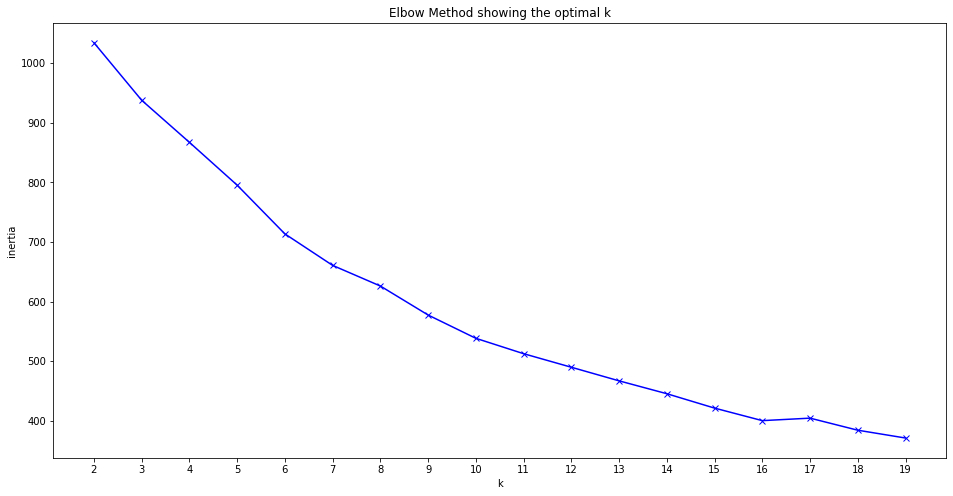

In [30]:
import numpy as np
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

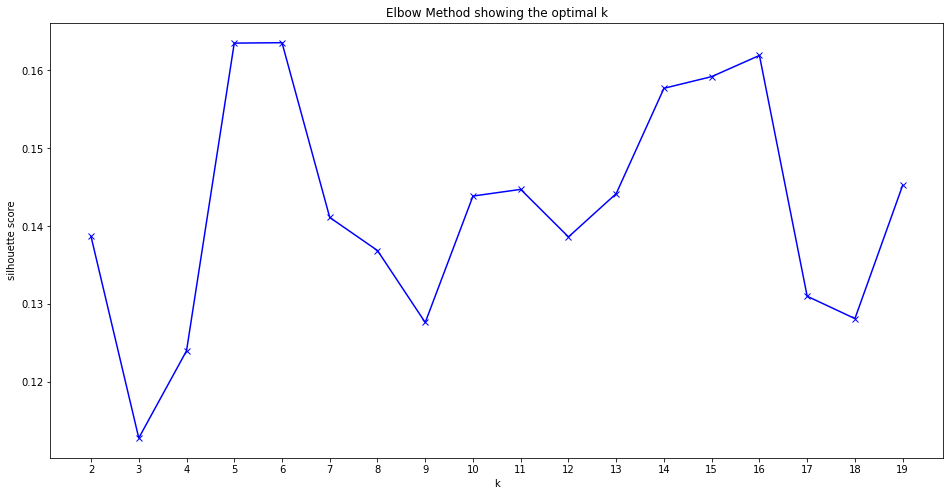

In [31]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')